In [1]:
# initialization cell
from pandas_datareader import data, wb
from nsepy import get_history as nse
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

#start and end of data period
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2019, 11, 1)

#tickers to consider
symbol=['SBIN','RELIANCE','MARUTI']

#iterations
i=10000

#seed for iterations
np.random.seed(11)


In [2]:
#create data
#tickers to consider
#symbol=['SBIN','INFY','MARUTI']

#to select a single stock ticker -
#SBIN = nse('SBIN',start=start,end=end) [['Symbol','Close']]

#for multiple:

#creating an empty dataframe with the same no. of colums and then appending dataframes 
#of other tickers

stock=pd.DataFrame(columns=['Symbol','Close'])
for s in symbol:
    stock=stock.append(nse(symbol=s,start=start,end=end) [['Symbol','Close']] )

# reagrrange the table using pivot
stock=stock.pivot(columns='Symbol',values='Close')

In [3]:
# get returns
returns = pd.DataFrame()
covar = pd.DataFrame()
for s in symbol:
    returns[s+'_Ret'] = stock[s].pct_change()


ann_ret= returns.mean()*252
covar=returns.cov()
ann_cov= covar *252


In [4]:
ann_ret

SBIN_Ret        0.146672
RELIANCE_Ret    0.180206
MARUTI_Ret      0.166497
dtype: float64

In [5]:
# Monte carlo iteration

num_assets = len(symbol)

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
stock_weights = []
sharpe_ratio = []

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(i):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, ann_ret)
    volatility = np.sqrt(np.dot(weights.T, np.dot(ann_cov, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)



In [6]:
# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe_Ratio': sharpe_ratio}

for cnt,sym in enumerate(symbol):
    portfolio[sym+'_wt'] = [weight[cnt] for weight in stock_weights]

#create dataframe from dictionary
df_ptf = pd.DataFrame(portfolio)

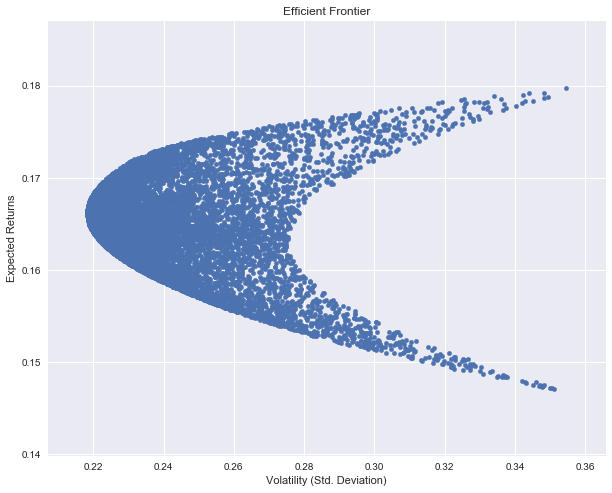

In [16]:
# plot the efficient frontier with a scatter plot
plt.style.use('seaborn')
#df_ptf.plot.scatter(x='Volatility', y='Returns', c='Sharpe_Ratio',cmap='RdYlGn',edgecolors='black',  grid=True)
df_ptf.plot.scatter(x='Volatility', y='Returns', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [41]:
#new list for efficient frontier
ret_front=[]
frontier =np.linspace(df_ptf['Volatility'].min(),df_ptf['Volatility'].max(),50)
#iterate 
for f in range(len(frontier)-1):
    #print (frontier[f],frontier[f+1])
    tmp=df_ptf[(df_ptf['Volatility'] >= frontier[f]) & (df_ptf['Volatility'] < frontier[f+1])]
    ret_front.append(tmp['Returns'].max())
#make into a datafram
    df_eff=pd.DataFrame(ret_front)
    

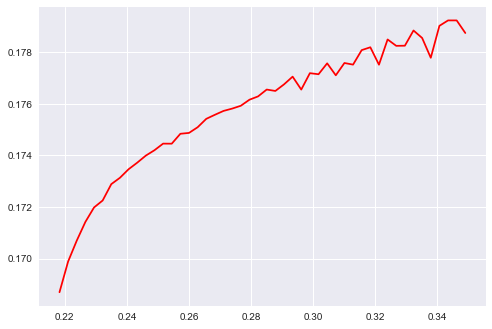

In [47]:
     #plotting frontier:
plt.plot(frontier[:49],ret_front,color='red');


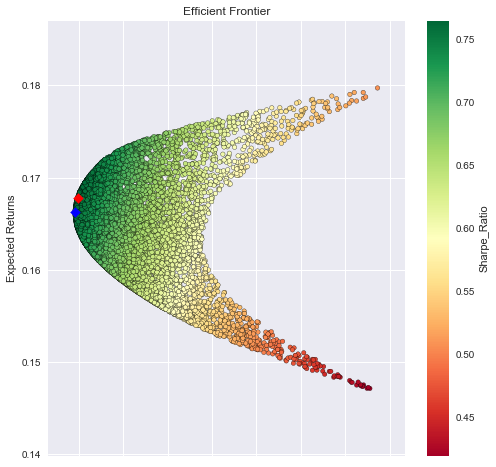

In [9]:
# find min Volatility & max sharpe values in the dataframe (df)
min_volatility = df_ptf['Volatility'].min()
max_sharpe = df_ptf['Sharpe_Ratio'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df_ptf.loc[df_ptf['Sharpe_Ratio'] == max_sharpe]
min_variance_port = df_ptf.loc[df_ptf['Volatility'] == min_volatility]

# plot the efficient frontier with a scatter plot
plt.style.use('seaborn')
df_ptf.plot.scatter(x='Volatility', y='Returns', c='Sharpe_Ratio',
                    cmap='RdYlGn',edgecolors='black',figsize=(8, 8),  grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=50)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=50 )
#df_ptf.plot.scatter(x='Volatility', y='Returns', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [63]:
# vol between 0.218 and 0.354
#required vol between
vol= [0.25,0.27]
# select max ret
tmp1=df_ptf[(df_ptf['Volatility'] >= vol[0]) & (df_ptf['Volatility'] < vol[1])]
max_r=tmp1['Returns'].max()
para_max_r=df_ptf[df_ptf['Returns']==max_r]
#select max Sharpe Ratio
max_sr=tmp1['Sharpe_Ratio'].max()
para_max_sr=df_ptf[df_ptf['Sharpe_Ratio']==max_sr]


In [62]:
para_max_r

,Returns,Volatility,Sharpe_Ratio,SBIN_wt,RELIANCE_wt,MARUTI_wt
4952,0.175576,0.269935,0.650437,0.000538,0.663014,0.336447


In [64]:
para_max_sr

,Returns,Volatility,Sharpe_Ratio,SBIN_wt,RELIANCE_wt,MARUTI_wt
4707,0.174163,0.250383,0.695586,0.001773,0.561711,0.436516
